# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [47]:
# Libraries
import numpy as np
import pandas as pd
absence = pd.read_csv("../data/absences.csv")

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

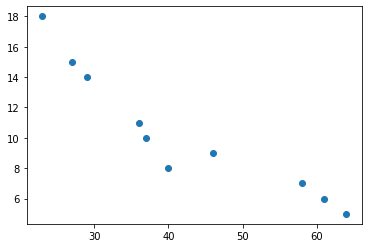

In [9]:
plt.scatter(absence["Age"],absence["Absences"])

In [ ]:
# yes it seems to be correlated

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [70]:
import statistics

def slope_intercept (x,y):
    x_mean = statistics.mean(x)
    y_mean = statistics.mean(y)
    dif_xy = []
    xsqr = []
    for i in range(len(x)):
        x_y = (x[i]- x_mean)*(y[i]-y_mean)
        dif_xy.append(x_y)
        xnum = (x[i]-x_mean)**2
        xsqr.append(xnum)
        
    slope = sum(dif_xy)/sum(xsqr)
    intercept = y_mean - slope*x_mean
        
    return slope,intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [43]:
list_age = absence["Age"].tolist()
list_absence = absence["Absences"].tolist()

In [71]:
slope_intercept(list_age,list_absence)

(-0.2681088337033404, 21.58738189891063)

In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [64]:
def cov_correl (x,y):
    covar = np.cov(x,y)
    correl= np.corrcoef(x,y)
    return "covariance is:" , covar, "correlation is: ",correl

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [63]:
cov_correl (absence["Age"],absence["Absences"])

('covariance is:', array([[215.21111111, -57.7       ],
        [-57.7       ,  17.78888889]]), 'correlation ins: ', array([[ 1.        , -0.93254341],
        [-0.93254341,  1.        ]]))

In [ ]:
# covariance is -56, and correlation is 0,9. which indicates a strong negative correlation.
# so yes, there is a relationshop taht indicates that: the yourger someone is, more absences he has.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# yes, there is a relationshop taht indicates that: the yourger someone is, more absences he has.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [53]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [65]:
cov_correl(ironbeers_df["X"],ironbeers_df["Y"])

('covariance is:', array([[18.85714286, 12.        ],
        [12.        ,  8.        ]]), 'correlation is: ', array([[1.        , 0.97700842],
        [0.97700842, 1.        ]]))

In [ ]:
# covariance is positive and correlation is close to one. that indicates that there is a positive strong correlation between you saind you'll stay, and people staying.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

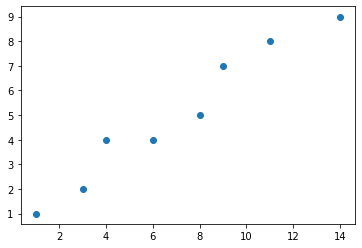

In [72]:
plt.scatter(ironbeers_df["X"],ironbeers_df["Y"])

In [ ]:
# the graph already makes is easy to see that there is a correlation between x (the number of people that you told to stay) and Y (number of people that actually stayed)

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [73]:
slope_intercept(ironbeers_df["X"],ironbeers_df["Y"])

(0.6363636363636364, 0.5454545454545459)

In [ ]:
#the line indicates that the slope is positive. figuring x is zero, y would be o.5, which makes sense looking at the graph, but it doesn't make sense applying to the real life scenario.


#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# yes

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [76]:
expected_y = []
for x in ironbeers_df["X"]:
    
    y = 0.54 + 0.63*x
    expected_y.append(y)
expected_y
ironbeers_df["expected_y"]=expected_y

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [80]:
errors = []
for i in range(len(expected_y)):
    real_y = ironbeers_df["Y"].tolist()
    e = real_y[i] - expected_y[i]
    errors.append(e)
ironbeers_df["error"]=errors


In [81]:
ironbeers_df

,X,Y,expected_y,error
0,1,1,1.17,-0.17
1,3,2,2.43,-0.43
2,4,4,3.06,0.94
3,6,4,4.32,-0.32
4,8,5,5.58,-0.58
5,9,7,6.21,0.79
6,11,8,7.47,0.53
7,14,9,9.36,-0.36


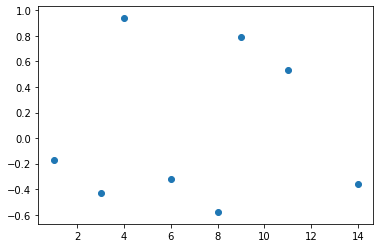

In [84]:
plt.scatter(ironbeers_df["X"],ironbeers_df["error"])

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# two points

#### 4.- Remove the points with a high error and recalculate the regression line.

In [87]:
ironbeers_df= ironbeers_df.drop([2,5])

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [88]:
cov_correl(ironbeers_df["X"],ironbeers_df["Y"])

('covariance is:', array([[23.76666667, 15.43333333],
        [15.43333333, 10.16666667]]), 'correlation is: ', array([[1.       , 0.9928561],
        [0.9928561, 1.       ]]))

In [ ]:
# correlation got higher, which means now the prediction is better. the model has smaller errors.